In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [ ]:
df = pd.read_csv('/content/cleaned.csv')

In [ ]:
df.head()

ot a Pedestrian  \
31-50   Male Elementary school  Employee 1-2yr   other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  Not a Pedestrian   
Unknown Male Elementary school  Employee Unknown other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  Unknown or other   
             Junior high school Employee 1-2yr   Undivided Two way                                Unknown     Asphalt roads Daylight Normal Collision with roadside objects Going straight  Unknown or other   
             Unknown            Employee 5-10yr  Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  Not a Pedestrian   
31-50   Male Elementary school  Owner    1-2yr   Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  Not a Pedestrian   

                                                                                                                                                                                            Changing lane to the left  \
31-50   Male Elementary school  Employee 1-2yr   other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight                Overturning   
Unknown Male Elementary school  Employee Unknown other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight              No distancing   
             Junior high school Employee 1-2yr   Undivided Two way                                Unknown     Asphalt roads Daylight Normal Collision with roadside objects Going straight         Driving carelessly   
             Unknown            Employee 5-10yr  Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight              No distancing   
31-50   Male Elementary school  Owner    1-2yr   Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  Changing lane to the left   

                                                                                                                                                                                            1  
31-50   Male Elementary school  Employee 1-2yr   other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  1  
Unknown Male Elementary school  Employee Unknown other                                            Unknown     Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  1  
             Junior high school Employee 1-2yr   Undivided Two way                                Unknown     Asphalt roads Daylight Normal Collision with roadside objects Going straight  1  
             Unknown            Employee 5-10yr  Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  2  
31-50   Male Elementary school  Owner    1-2yr   Two-way (divided with broken lines road marking) No junction Asphalt roads Daylight Normal Vehicle with vehicle collision  Going straight  2

In [ ]:
df.columns

Index(['ot a Pedestrian', 'Changing lane to the left', '1'], dtype='object')

In [ ]:
df.isna().sum()

ot a Pedestrian              0
Changing lane to the left    0
1                            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7150 entries, ('31-50', 'Male', 'Elementary school', 'Employee', '1-2yr', 'other', 'Unknown', 'Asphalt roads', 'Daylight', 'Normal', 'Vehicle with vehicle collision', 'Going straight') to ('18-30', 'Male', 'Junior high school', 'Employee', '5-10yr', 'Undivided Two way', 'O Shape', 'Asphalt roads', 'Darkness - lights lit', 'Normal', 'Vehicle with vehicle collision', 'Stopping')
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ot a Pedestrian            7150 non-null   object
 1   Changing lane to the left  7150 non-null   object
 2   1                          7150 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 255.0+ KB


In [ ]:
df.nunique()

ot a Pedestrian               9
Changing lane to the left    20
1                             3
dtype: int64

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))  # Ensure nGraphRow is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


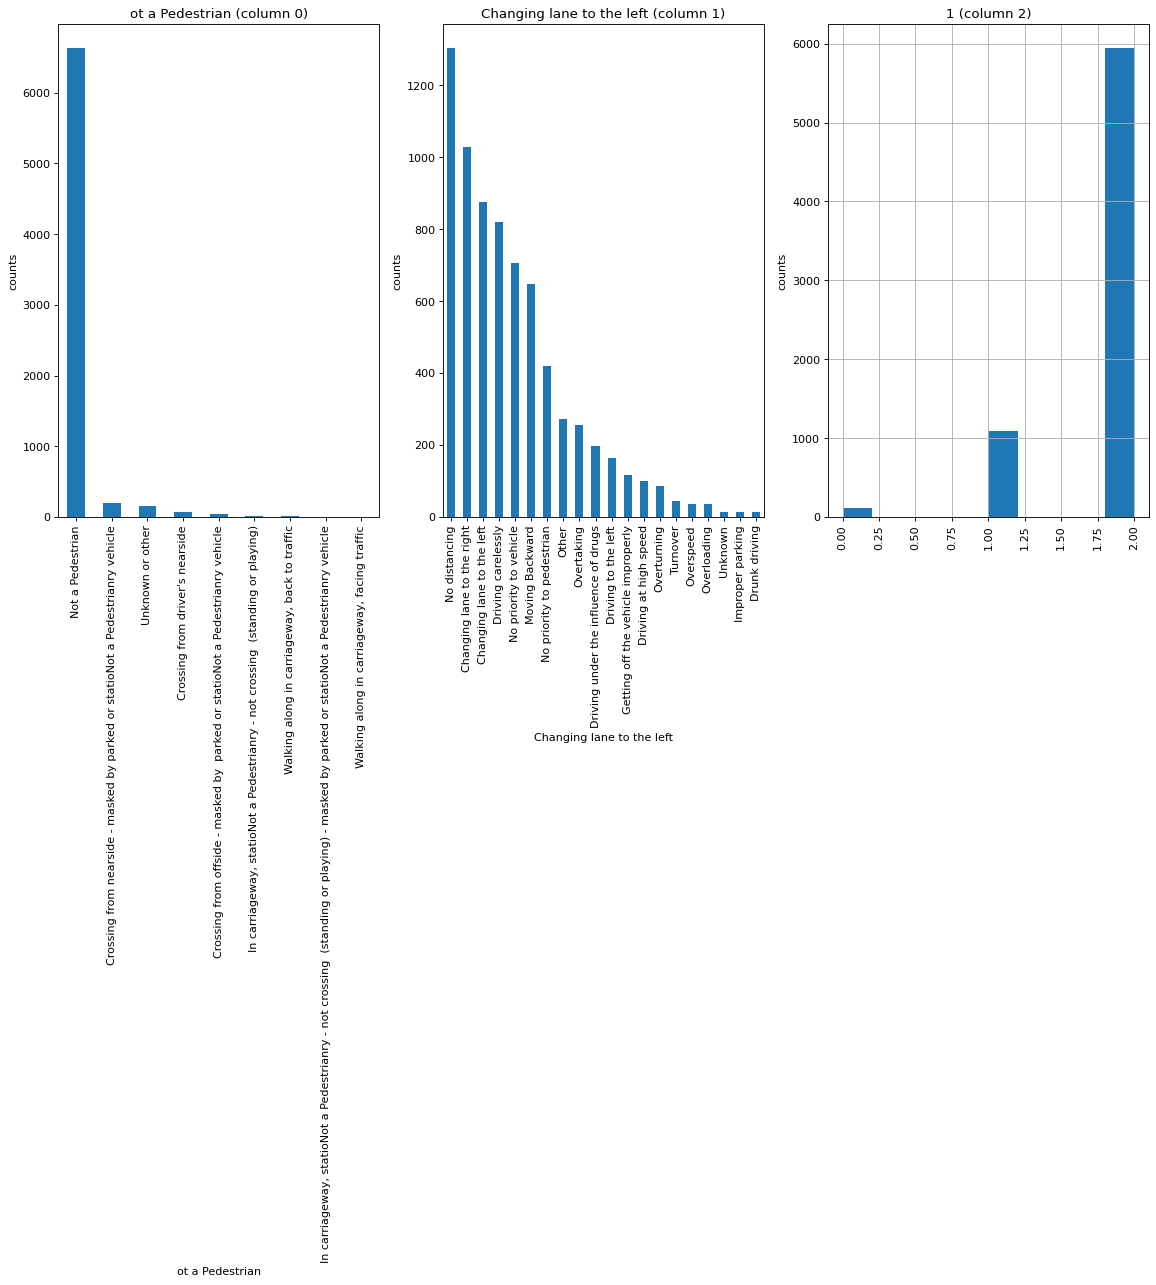

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
import seaborn as sns

def plotScatterMatrix(df, graphWidth, graphHeight):
    sns.set(style="ticks")
    sns.pairplot(df)
    plt.gcf().set_size_inches(graphWidth, graphHeight)
    plt.show()


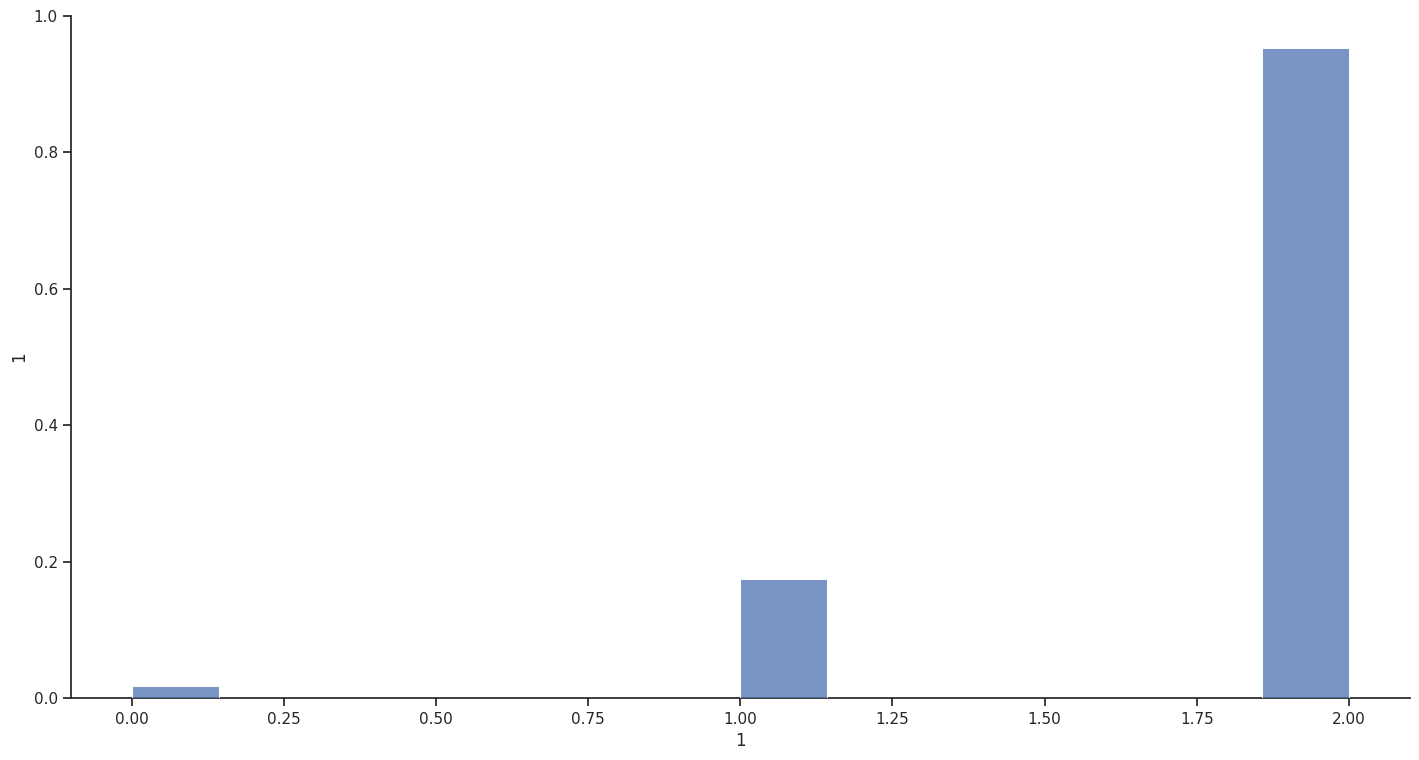

In [ ]:
plotScatterMatrix(df, 20, 10)